In [1206]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify as sq
from matplotlib.ticker import PercentFormatter
import plotly.express as px

from mlxtend.frequent_patterns import apriori, association_rules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr


from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [1207]:
df = pd.read_csv(r"C:/Users/dimit/OneDrive/Desktop/git_projects/git-projects/Pakistan Largest Ecommerce Dataset.csv.zip")

# 1 Data cleaning and preparation

In [1208]:
df['grand_total']=df['price']*df['qty_ordered']
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,7.000000,2016-7,7-2016,FY17,1.000000,NaN,NaN,NaN,NaN,NaN
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,7.000000,2016-7,7-2016,FY17,2.000000,NaN,NaN,NaN,NaN,NaN
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,7.000000,2016-7,7-2016,FY17,3.000000,NaN,NaN,NaN,NaN,NaN
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,360.000000,100147446,Beauty & Grooming,R-FSD-52352,...,7.000000,2016-7,7-2016,FY17,4.000000,NaN,NaN,NaN,NaN,NaN
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,7.000000,2016-7,7-2016,FY17,5.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1209]:
df=df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1) # drop unnamed - empty cells 

In [1210]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,360.000000,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [1212]:
df.describe() # grand_total < 0 from further inspection, grand_total had arithmetic wrongs, so we multyply again price*qty_ordered and take correct results

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,584524.000000,584524.000000,584524.000000,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6348.747531,1.296388,7177.306658,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,14949.269515,3.996061,33947.332235,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000,1.000000,0.000000,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,360.000000,1.000000,399.000000,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,899.000000,1.000000,999.000000,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4070.000000,1.000000,5000.000000,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1012625.900000,1000.000000,8944000.000000,90300.000000,2018.000000,12.000000,115326.000000


In [1213]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [1214]:
df=df.dropna(subset=['item_id','Customer ID']) # drop nan values

In [1215]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,360.000000,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.000000,cod,8/28/2018,WOFSCE5AE00357AECDE,699.000000,1.000000,699.000000,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.000000,8.000000,2018-8,8-2018,FY19,115320.000000
584520,905205.000000,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.000000,1.000000,35599.000000,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.000000,8.000000,2018-8,8-2018,FY19,115326.000000
584521,905206.000000,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.000000,2.000000,259998.000000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000
584522,905207.000000,processing,8/28/2018,MATSAM5B1509B4696EA,87300.000000,2.000000,174600.000000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000


Insights:

Negative grand totals typically indicate cancellations or refunds in many business scenarios. However, there are 27 completed orders having negative grand totals so there might be other factors or issues in the data.
Transactions with negative grand total are not only the canceled and refunded orders but some completed orders also have negative grand total. So considering the number of these transaction (76 rows in 584513 total rows) we will not include these rows from the data (without dropping them because we do not know exactly the reason of negative grand totals).

Exploring the status column to check the different categories of the order statuses

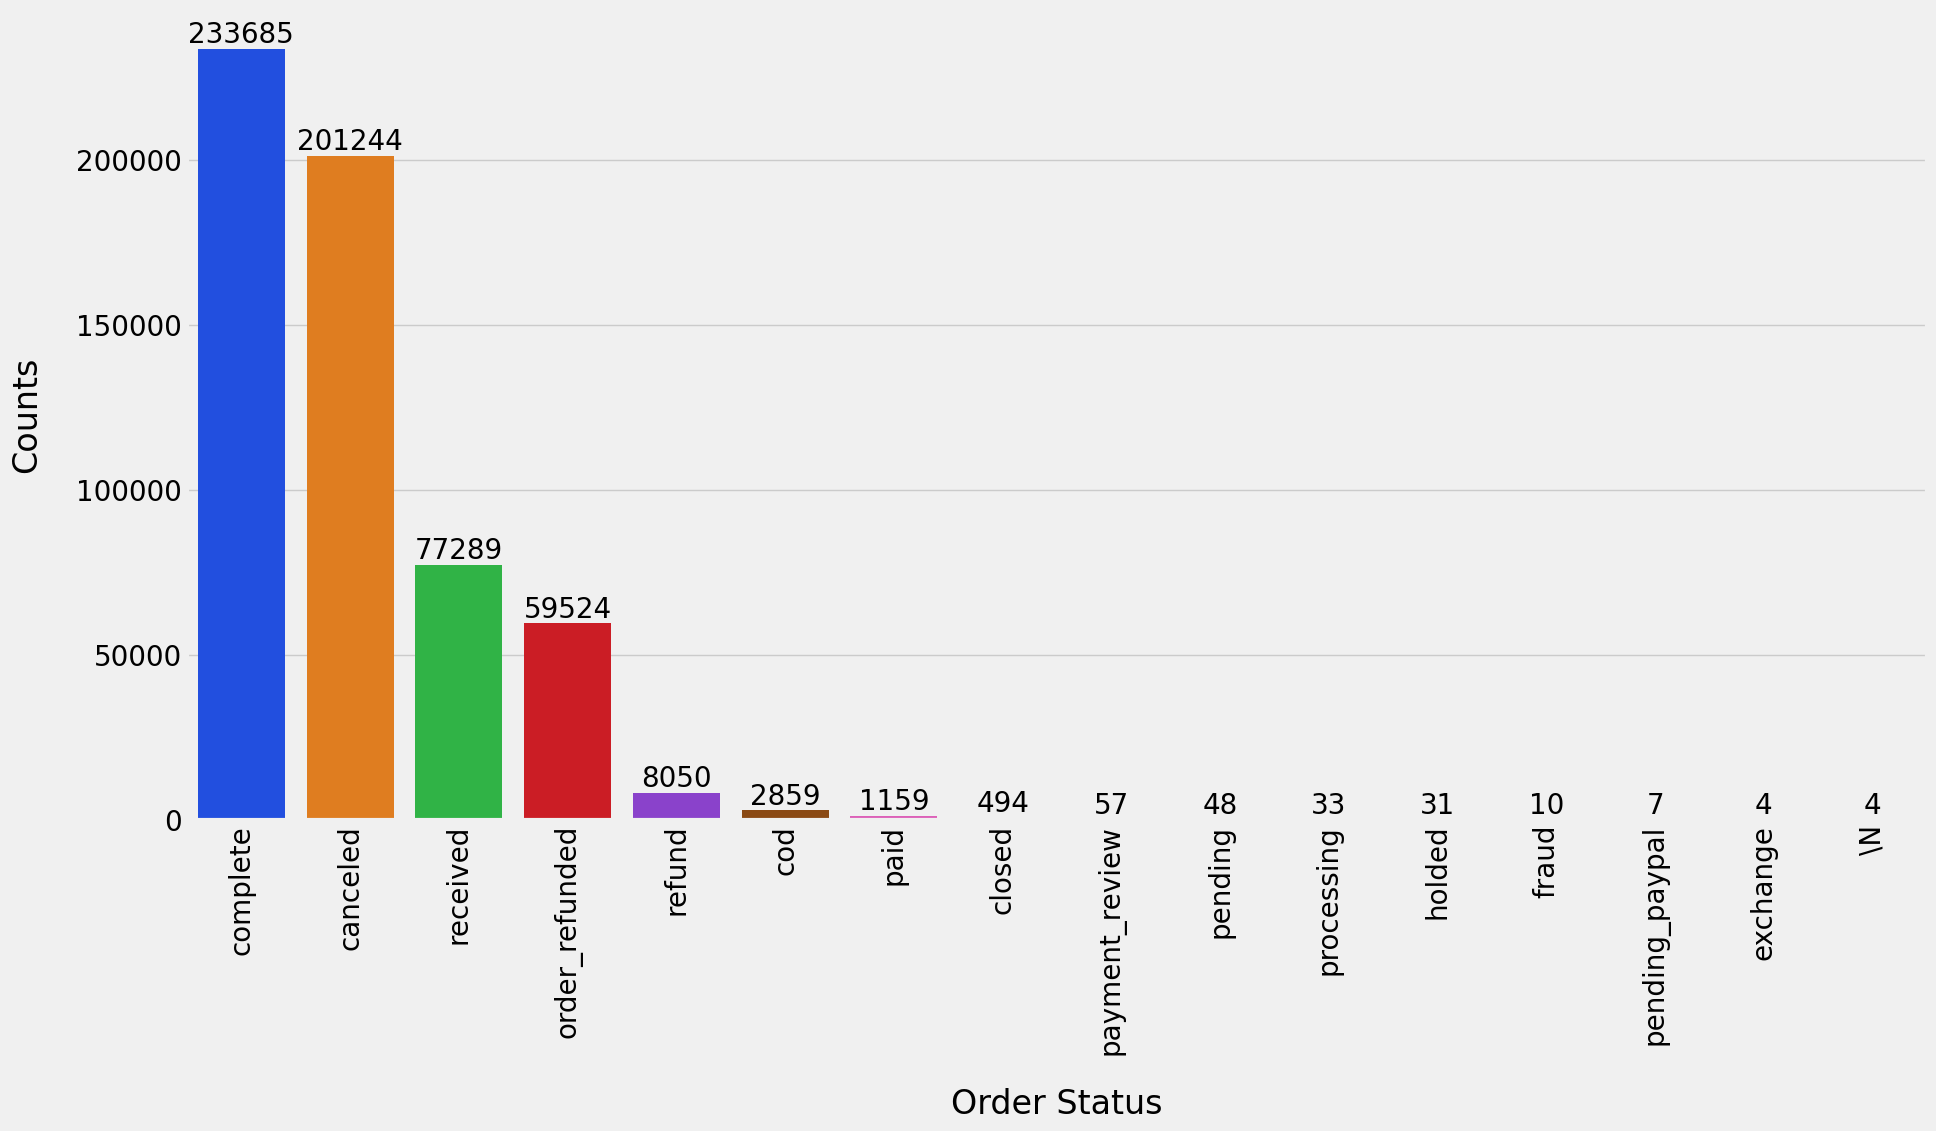

In [1216]:
plt.figure(figsize=(20,10))

status = df.status.value_counts()
status_df = pd.DataFrame(list(status.items()), columns=['Order Status', 'Counts'])

ax = sns.barplot(data = status_df, x= 'Order Status', y = "Counts", palette = "bright")
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='black')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Order Status', fontsize=24, labelpad=24, color='black')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='black')
plt.xticks(rotation=90, ha='center')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

Grouping similar in meaning categories 

In [1217]:
df['status']=df['status'].replace(to_replace=['order_refunded', 'refund'], value='refunded')
df['status']=df['status'].replace(to_replace=['received', 'paid'], value='complete')
df['status']=df['status'].replace(to_replace=['pending_paypal', 'holded', 'processing'], value='pending')

Converting pakistan currency to dollars

In [1218]:
df['price']=df['price']*0.004
df['grand_total']=df['grand_total']*0.004

In [1219]:
df.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137167
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since                0
M-Y                           0
FY                            0
Customer ID                   0
dtype: int64

Insights:

sales_commission_code has lot of missing values. This column is not required for our analysis so we drop it.
Furthermore we will drop the rows with NAN values in staus, created_at and category_name_1 columns.

In [1220]:
df = df.drop(['sales_commission_code'], axis=1)

df = df.dropna()

In [1221]:
# converting id's from float to string
df['item_id']=df['item_id'].astype(str) 
df['Customer ID']=df['Customer ID'].astype(str) 

# converting date from object to date
df['created_at']=pd.to_datetime(df['created_at'])

# rename col
df=df.rename(columns={"created_at": "order_date", 'Customer ID' : 'Customer_ID'}) # df['order_date']=df['created_at'].rename('order_date')

In [1222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584314 entries, 0 to 584523
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584314 non-null  object        
 1   status           584314 non-null  object        
 2   order_date       584314 non-null  datetime64[ns]
 3   sku              584314 non-null  object        
 4   price            584314 non-null  float64       
 5   qty_ordered      584314 non-null  float64       
 6   grand_total      584314 non-null  float64       
 7   increment_id     584314 non-null  object        
 8   category_name_1  584314 non-null  object        
 9   discount_amount  584314 non-null  float64       
 10  payment_method   584314 non-null  object        
 11  Working Date     584314 non-null  object        
 12  BI Status        584314 non-null  object        
 13   MV              584314 non-null  object        
 14  Year             584314 n

# 2. Sales trends and further investigation

# Sales trend in each Year

In [1223]:
df['status'].unique()

array(['complete', 'canceled', 'refunded', 'closed', 'fraud', 'pending',
       'exchange', '\\N', 'cod', 'payment_review'], dtype=object)

In [1224]:
df['status']= df['status'].astype(str)

In [1225]:
df_not_cancelled=df[df['status'] !='canceled']
df_not_cancelled

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer_ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,7.800000,1.000000,7.800000,100147443,Women's Fashion,0.000000,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.0
3,211135.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,1.440000,100147446,Beauty & Grooming,300.000000,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.0
4,211136.0,refunded,2016-07-01,BK7010400AG,2.220000,2.000000,4.440000,100147447,Soghaat,0.000000,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.0
6,211138.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,1.440000,100147449,Beauty & Grooming,300.000000,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,7.0
7,211139.0,complete,2016-07-01,UK_Namkino Mix Nimco 400 Gms,0.680000,1.000000,0.680000,100147450,Soghaat,0.000000,cod,7/1/2016,Net,170,2016.000000,7.000000,2016-7,7-2016,FY17,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,2.796000,1.000000,2.796000,100562385,Women's Fashion,0.000000,cod,8/28/2018,Valid,699,2018.000000,8.000000,2018-8,8-2018,FY19,115320.0
584520,905205.0,pending,2018-08-28,MATHUA5AF70A7D1E50A,142.396000,1.000000,142.396000,100562386,Mobiles & Tablets,0.000000,bankalfalah,8/28/2018,Gross,"35,599",2018.000000,8.000000,2018-8,8-2018,FY19,115326.0
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,519.996000,2.000000,1039.992000,100562387,Mobiles & Tablets,0.000000,bankalfalah,8/28/2018,Gross,"259,998",2018.000000,8.000000,2018-7,8-2018,FY19,113474.0
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,349.200000,2.000000,698.400000,100562387,Mobiles & Tablets,0.000000,bankalfalah,8/28/2018,Gross,"174,600",2018.000000,8.000000,2018-7,8-2018,FY19,113474.0


# Canceled orders per category

In [1226]:
canceled = df[df['status'] == 'canceled']
canceled

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer_ID
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,0.960000,1.000000,0.960000,100147444,Beauty & Grooming,0.000000,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,9.800000,1.000000,9.800000,100147445,Women's Fashion,0.000000,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.0
5,211137.0,canceled,2016-07-01,UK_Namkino All In One 200 Gms,0.320000,1.000000,0.320000,100147448,Soghaat,0.000000,cod,7/1/2016,Gross,80,2016.000000,7.000000,2016-7,7-2016,FY17,6.0
8,211140.0,canceled,2016-07-01,Apple iPhone 6S 64GB,385.996000,1.000000,385.996000,100147451,Mobiles & Tablets,0.000000,ublcreditcard,7/1/2016,Gross,"96,499",2016.000000,7.000000,2016-7,7-2016,FY17,8.0
9,211141.0,canceled,2016-07-01,Apple iPhone 6S 64GB,385.996000,1.000000,385.996000,100147452,Mobiles & Tablets,0.000000,mygateway,7/1/2016,Gross,"96,499",2016.000000,7.000000,2016-7,7-2016,FY17,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584493,905173.0,canceled,2018-08-28,APPWES59D48FAFBA959,6.792000,1.000000,6.792000,100562361,Appliances,0.000000,bankalfalah,8/28/2018,Gross,"1,698",2018.000000,8.000000,2018-8,8-2018,FY19,114062.0
584494,905174.0,canceled,2018-08-28,MATSAM5B6D7208C6D30,519.996000,1.000000,519.996000,100562362,Mobiles & Tablets,0.000000,bankalfalah,8/28/2018,Gross,"129,999",2018.000000,8.000000,2018-8,8-2018,FY19,115321.0
584495,905175.0,canceled,2018-08-28,MEFMOV5AD9155B0C0DC-M,4.192000,1.000000,4.192000,100562363,Men's Fashion,0.000000,bankalfalah,8/28/2018,Gross,"1,048",2018.000000,8.000000,2018-8,8-2018,FY19,115322.0
584498,905180.0,canceled,2018-08-28,APPUNI5A900E8199840,15.156000,1.000000,15.156000,100562366,Appliances,0.000000,bankalfalah,8/28/2018,Gross,"3,789",2018.000000,8.000000,2018-8,8-2018,FY19,114062.0


In [1227]:
fig = px.treemap(canceled, 
                 path=['category_name_1'], template='plotly_dark')
fig.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
fig.show()

# Insights:

The most canceled orders came from Mobile & tablets, Men's Fashion and Appliances

In [1228]:
# Defining a date filter for df to separate every year 
def df_filter_trend(year, xaxis, yaxis):
    df_year_filter=df_not_cancelled[df_not_cancelled['Year']== year]
    df_cat_sales= df_year_filter.groupby(xaxis)[yaxis].sum().reset_index()
    df_cat_sort= df_cat_sales.sort_values([xaxis], ascending=True)
    return df_cat_sort

In [1229]:
trend_2016= df_filter_trend(2016, "order_date", "grand_total")
trend_2017= df_filter_trend(2017, "order_date", "grand_total")
trend_2018= df_filter_trend(2018, "order_date", "grand_total")

In [1230]:
## Plotly Line chart to track the sales trend in each year

fig = make_subplots(rows=3, cols=1, subplot_titles=("Sales trend in Year 2016", "Sales trend in Year 2017",
                                                    "Sales trend in Year 2018"))

fig.append_trace(go.Scatter(
    x=trend_2016["order_date"],
    y=trend_2016["grand_total"],
    name="Sales in 2016",
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=trend_2017["order_date"],
    y=trend_2017["grand_total"],
    name="Sales in 2017",
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=trend_2018["order_date"],
    y=trend_2018["grand_total"],
    name="Sales in 2018",
), row=3, col=1)


fig.update_layout(height=800, width=1200, title_text="Tracking Sales Trend in each year")
fig.update_layout(
paper_bgcolor = " #f2f2f2",
plot_bgcolor = " #f2f2f2",
font=dict(family='sans-serif',
                  color='black',
                  size=10),


)
fig.show()

# Insights:

Year 2016: steadily line, a sharp rise in 25th November: 117k$ 
Year 2017: steadily line, sharp rises in May 112k $, June 149k $ and 24th November biggest sharp 300k $
Year 2018: best Year than the other two, with many sharp rises in the bigger part of the year 145k $


# Years Sales by category

In [1231]:
def df_filter_cat(year, xaxis, yaxis):
    df_year_filter=df_not_cancelled[df_not_cancelled['Year']== year]
    df_cat_sales= df_year_filter.groupby(xaxis)[yaxis].sum().reset_index()
    df_cat_sort= df_cat_sales.sort_values([yaxis], ascending=False)
    return df_cat_sort

In [1232]:
cat_2016= df_filter_cat(2016, "category_name_1", "grand_total")
cat_2017= df_filter_cat(2017, "category_name_1", "grand_total")
cat_2018= df_filter_cat(2018, "category_name_1", "grand_total")

In [1233]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("Top Categories with Sales in Year 2016", "Top Categories with Sales in Year 2017",
                                                    "Top Categories with Sales in Year 2018"))

fig.append_trace(go.Bar(
    x=cat_2016["category_name_1"],
    y=cat_2016["grand_total"],
    name="2016"
), row=1, col=1)

fig.append_trace(go.Bar(
    x=cat_2017["category_name_1"],
    y=cat_2017["grand_total"],
    name="2017"
), row=2, col=1)

fig.append_trace(go.Bar(
    x=cat_2018["category_name_1"],
    y=cat_2018["grand_total"],
    name="2018"
), row=3, col=1)

fig.update_yaxes(title=dict(text= "Sales"))
fig.update_layout(height=800, width=900, title_text="Best selling Categories in each year")
fig.update_layout(
paper_bgcolor = " #f2f2f2",
plot_bgcolor = " #f2f2f2",
font=dict(family='sans-serif',
                  color='black',
                  size=10),


)

fig.show()

# Insights:

There are not significant changes in sales of top categories trends throught the years

# Top selling category all the Years

In [1234]:
best_selling_category=df_not_cancelled.groupby(['category_name_1']).agg({'grand_total': 'sum','Customer_ID': 'nunique'}).round(2).sort_values('grand_total', ascending=False).reset_index()#.plot.bar()
best_selling_category.head(7)

,category_name_1,grand_total,Customer_ID
0,Mobiles & Tablets,3308292.900000,26280
1,Appliances,1181996.340000,13792
2,Entertainment,1003509.410000,6437
3,Women's Fashion,301431.610000,15536
4,Computing,268636.320000,5701
5,Men's Fashion,246564.380000,27034
6,Others,219998.100000,6509


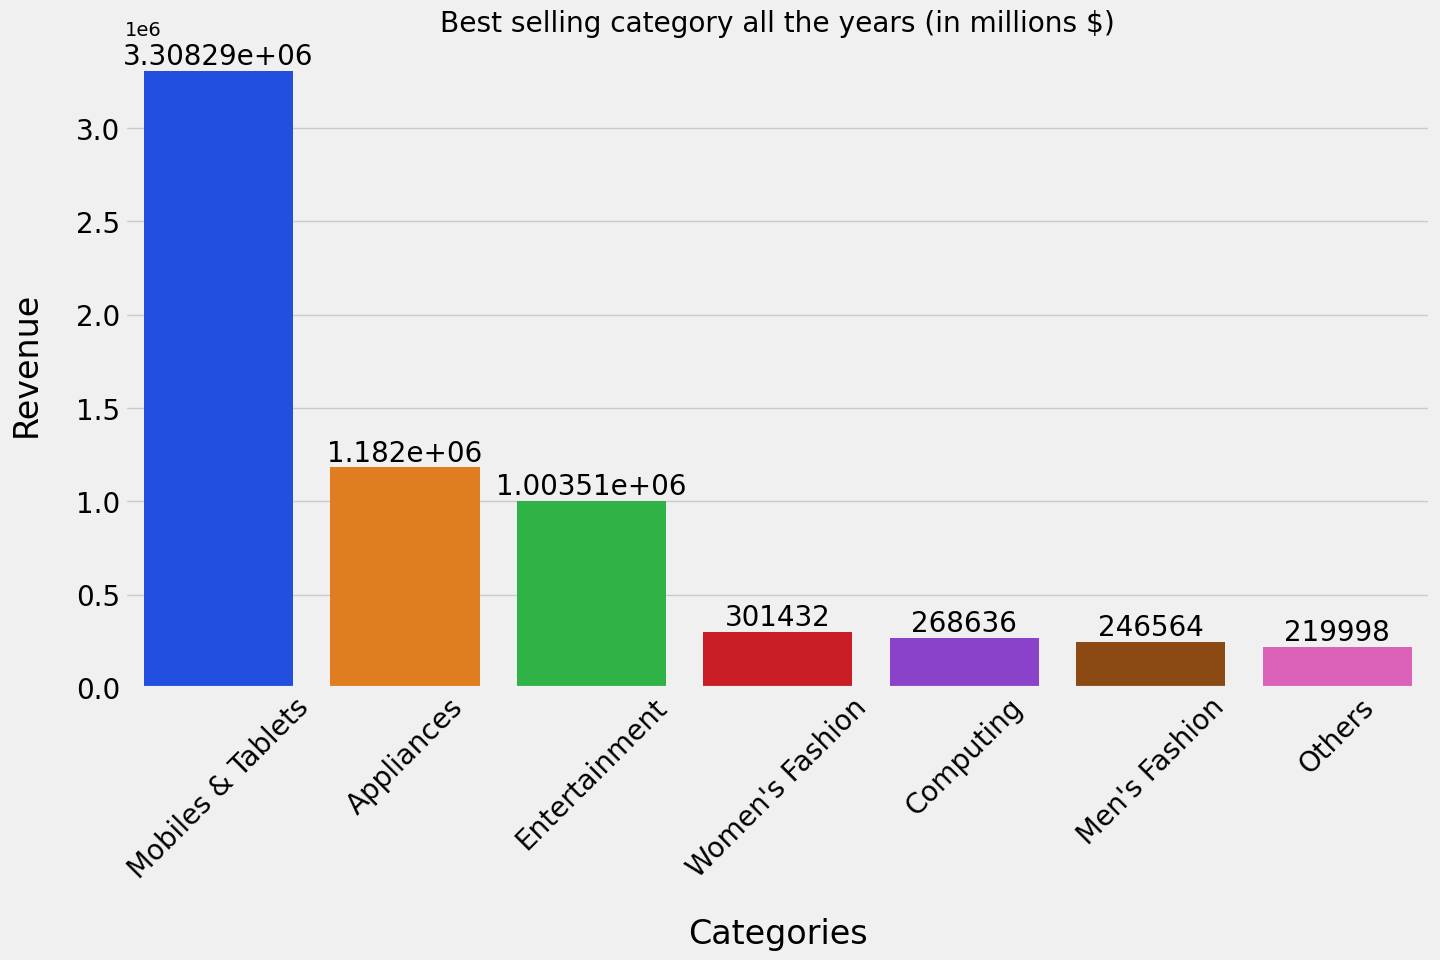

In [1235]:
plt.figure(figsize=(15,8))
plt.title('Best selling category all the years (in millions $)')


ax = sns.barplot(data = best_selling_category.head(7), x= 'category_name_1', y = "grand_total", palette = "bright")
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='black')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Categories', fontsize=24, labelpad=24, color='black')
plt.ylabel('Revenue', fontsize=24, labelpad=24, color='black')
plt.xticks(rotation=90, ha='center')
ax.tick_params(axis='x', colors='black', rotation=45)
ax.tick_params(axis='y', colors='black')

# Insights:

Top 7 categories as for revenue amount. (in millions $).
Seems that the category Mobiles & Tablets had great value in Pakistani market, provided that were spent 3.27 million dollars in three years.

# Top 10 most famous Products.

In [1236]:
all=df_not_cancelled.groupby(['item_id'])['qty_ordered'].sum().sort_values(ascending=False).head(20).reset_index()
tech=df_not_cancelled[df_not_cancelled['category_name_1'] == 'Mobiles & Tablets'].groupby(['item_id'])['qty_ordered'].sum().sort_values(ascending=False).head(5).reset_index()
appliances=df_not_cancelled[df_not_cancelled['category_name_1'] == 'Appliances'].groupby(['item_id'])['qty_ordered'].sum().sort_values(ascending=False).head(5).reset_index()
ent=df_not_cancelled[df_not_cancelled['category_name_1'] == 'Entertainment'].groupby(['item_id'])['qty_ordered'].sum().sort_values(ascending=False).head(5).reset_index()


In [1237]:
fig = make_subplots(rows=4, cols=1, subplot_titles=("Top items from All categories", "Top items Mobiles & Tablets", "Top items Appliances",
                                                    "Top items Entertainment"))

fig.append_trace(go.Bar(
    x=all["item_id"],
    y=all["qty_ordered"],
    name="All categories"
), row=1, col=1)

fig.append_trace(go.Bar(
    x=tech["item_id"],
    y=tech["qty_ordered"],
    name="Mobiles & Tablets"
), row=2, col=1)

fig.append_trace(go.Bar(
    x=appliances["item_id"],
    y=appliances["qty_ordered"],
    name="Appliances"
), row=3, col=1)

fig.append_trace(go.Bar(
    x=ent["item_id"],
    y=ent["qty_ordered"],
    name="Entertainment"
), row=4, col=1)

fig.update_yaxes(title=dict(text= "Quantity"))
fig.update_layout(height=800, width=900, title_text="Most famous Products")
fig.update_layout(
paper_bgcolor = " #f2f2f2",
plot_bgcolor = " #f2f2f2",
font=dict(family='sans-serif',
                  color='black',
                  size=10),


)

fig.show()

# Insights:

There are products that do not belong in top 3 categories but they had purchased more than top products from a top category, so they have big opportunity to expand!
For Mobiles and Tablets there are 3 most famous products same as top 3 products from all categories. 
For the Appliances and Entertainment there are not specific insights for famous products because numbers are too low in proportion to time and size of data. 

# Average basket per category

In [1238]:
per_category=df_not_cancelled.groupby(['category_name_1']).agg({'grand_total': np.sum, 'Customer_ID': pd.Series.nunique}).reset_index()

In [1239]:
per_category['average_basket']=per_category['grand_total']/per_category['Customer_ID']
average_basket_per_category=per_category.sort_values('average_basket', ascending=False)
average_basket_per_category

,category_name_1,grand_total,Customer_ID,average_basket
4,Entertainment,1003509.412960,6437,155.897066
9,Mobiles & Tablets,3308292.901280,26280,125.886336
0,Appliances,1181996.339200,13792,85.701591
3,Computing,268636.316760,5701,47.120912
15,\N,89346.802560,2506,35.653153
10,Others,219998.100000,6509,33.799063
14,Women's Fashion,301431.611280,15536,19.402138
13,Superstore,99045.114840,5601,17.683470
1,Beauty & Grooming,107678.479640,11228,9.590175
6,Home & Living,79070.381440,8550,9.247998


In [1240]:
best_selling_category['average_basket']=best_selling_category['grand_total']/best_selling_category['Customer_ID']
average_basket_per_category=best_selling_category.sort_values('average_basket', ascending=False)
average_basket_per_category

,category_name_1,grand_total,Customer_ID,average_basket
2,Entertainment,1003509.410000,6437,155.897065
0,Mobiles & Tablets,3308292.900000,26280,125.886336
1,Appliances,1181996.340000,13792,85.701591
4,Computing,268636.320000,5701,47.120912
9,\N,89346.800000,2506,35.653152
6,Others,219998.100000,6509,33.799063
3,Women's Fashion,301431.610000,15536,19.402138
8,Superstore,99045.110000,5601,17.683469
7,Beauty & Grooming,107678.480000,11228,9.590175
10,Home & Living,79070.380000,8550,9.247998


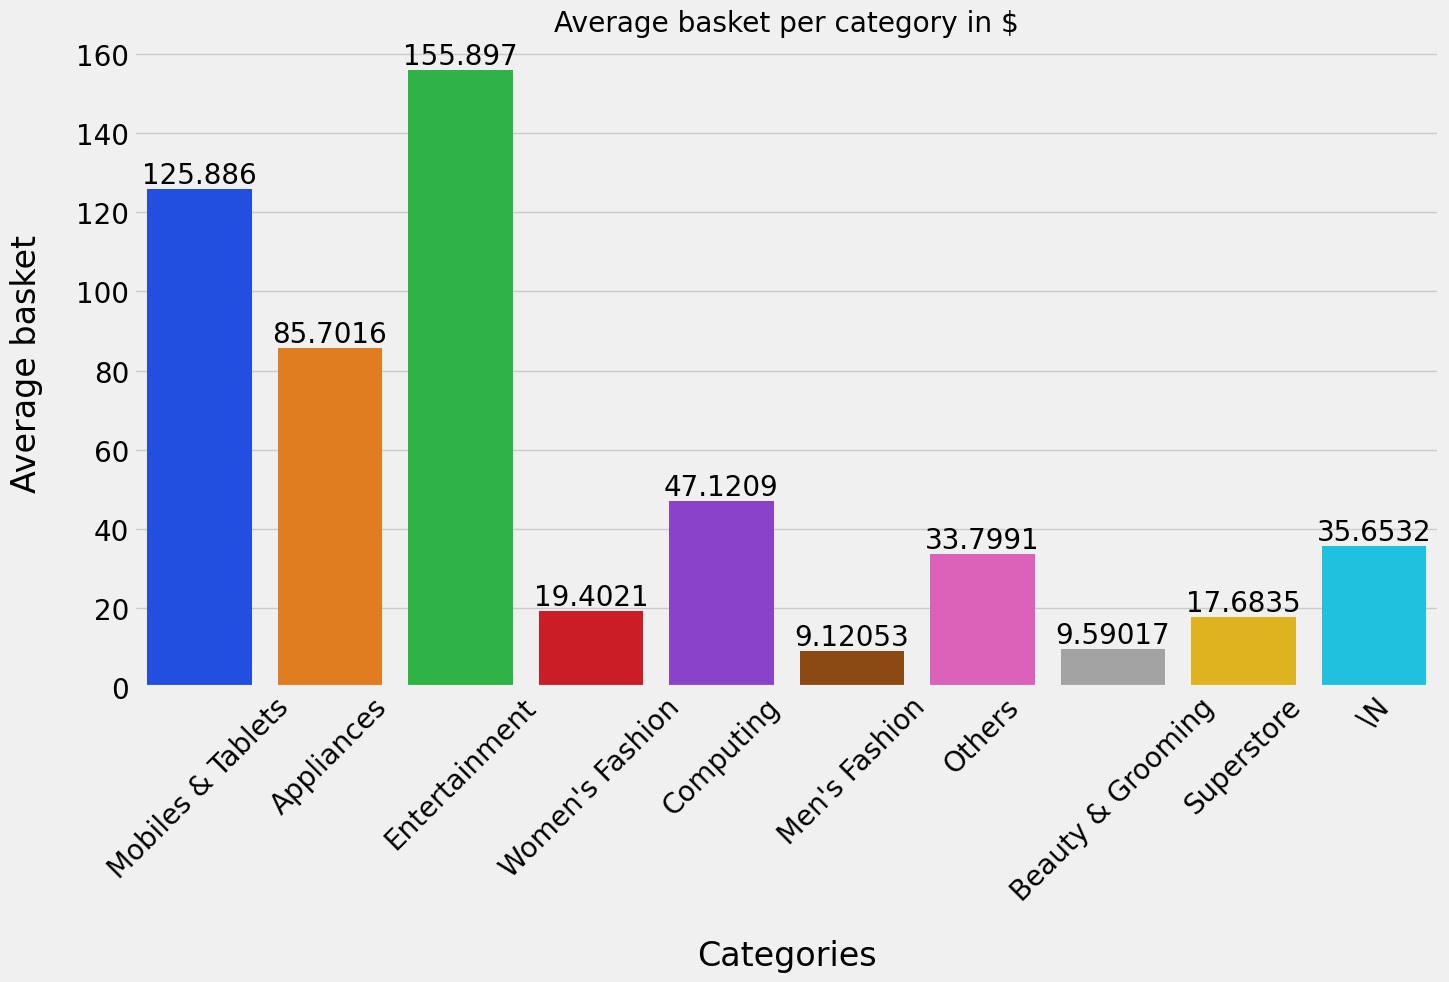

In [1241]:
plt.figure(figsize=(15,8))
plt.title('Average basket per category in $')


ax = sns.barplot(data = best_selling_category.head(10), x= 'category_name_1', y = "average_basket", palette = "bright")
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='black')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Categories', fontsize=24, labelpad=24, color='black')
plt.ylabel('Average basket', fontsize=24, labelpad=24, color='black')
plt.xticks(rotation=90, ha='center')
ax.tick_params(axis='x', colors='black', rotation=45)
ax.tick_params(axis='y', colors='black')

# Insights:

Category of Entertainment is opportunity to expand because people who buys entertainment's products tend to spend more money per purchase. In this category try to attract more people. 
Men's Fashion is famous (top 5 in revenue) but with low average basket

In [1242]:
df.shape

(584314, 20)

In [1243]:
df.describe()

,order_date,price,qty_ordered,grand_total,discount_amount,Year,Month
count,584314,584314.000000,584314.000000,584314.000000,584314.000000,584314.000000,584314.000000
mean,2017-08-08 09:54:23.580882688,25.403065,1.294308,28.717408,499.655327,2017.043819,7.168726
min,2016-07-01 00:00:00,0.000000,1.000000,0.000000,-599.500000,2016.000000,1.000000
25%,2017-01-29 00:00:00,1.440000,1.000000,1.596000,0.000000,2017.000000,4.000000
50%,2017-08-17 00:00:00,3.597600,1.000000,3.996000,0.000000,2017.000000,7.000000
75%,2018-02-03 00:00:00,16.360000,1.000000,20.000000,160.734400,2018.000000,11.000000
max,2018-08-28 00:00:00,4050.503600,1000.000000,35776.000000,90300.000000,2018.000000,12.000000
std,NaN,59.805980,3.988150,135.812834,1507.185808,0.707261,3.486263


In [1244]:
df[df['price']==0]

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer_ID
6598,218538.0,canceled,2016-07-26,"west point_Deluxe Juicer, Blender & Grinder - ...",0.000000,1.000000,0.000000,100152813,Appliances,0.000000,cod,7/26/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,1961.0
6603,218542.0,canceled,2016-07-26,"west point_Deluxe Juicer, Blender & Grinder - ...",0.000000,1.000000,0.000000,100152817,Appliances,0.000000,cod,7/26/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,1962.0
7004,218988.0,canceled,2016-07-27,"west point_Deluxe Juicer, Blender & Grinder - ...",0.000000,1.000000,0.000000,100153144,Appliances,0.000000,cod,7/27/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,1085.0
8298,220494.0,canceled,2016-07-29,stinnos_1301,0.000000,1.000000,0.000000,100154287,Kids & Baby,0.000000,cod,7/29/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,2247.0
8333,220540.0,canceled,2016-07-29,stinnos_1301,0.000000,10.000000,0.000000,100154316,Kids & Baby,0.000000,cod,7/29/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,2257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584260,904901.0,cod,2018-08-27,COMTOO59D5164EE7D18,0.000000,2.000000,0.000000,100562217,Computing,0.000000,cod,8/27/2018,Valid,-,2018.000000,8.000000,2018-8,8-2018,FY19,115277.0
584261,904902.0,cod,2018-08-27,COMTOO59D5164EE7D18,0.000000,2.000000,0.000000,100562218,Computing,0.000000,cod,8/27/2018,Valid,-,2018.000000,8.000000,2018-8,8-2018,FY19,115278.0
584264,904906.0,cod,2018-08-27,COMTOO59D5164EE7D18,0.000000,2.000000,0.000000,100562220,Computing,0.000000,cod,8/27/2018,Valid,-,2018.000000,8.000000,2018-8,8-2018,FY19,115279.0
584270,904916.0,cod,2018-08-27,COMTOO59D5164EE7D18,0.000000,2.000000,0.000000,100562222,Computing,0.000000,cod,8/27/2018,Valid,-,2018.000000,8.000000,2018-8,8-2018,FY19,115281.0


In [1245]:
df=df_not_cancelled[(df_not_cancelled['price']>0) & (df_not_cancelled['grand_total']>0)]

# RFM Analysis 

Implement RFM Analysis on the customer base 
Categorize the customers into 12 different categories 

In [1246]:
df['Recency'] = (df['order_date'].max() - df['order_date']).dt.days
df.head()

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,...,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer_ID,Recency
0,211131.0,complete,2016-07-01,kreations_YI 06-L,7.800000,1.000000,7.800000,100147443,Women's Fashion,0.000000,...,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.0,788
3,211135.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,1.440000,100147446,Beauty & Grooming,300.000000,...,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.0,788
4,211136.0,refunded,2016-07-01,BK7010400AG,2.220000,2.000000,4.440000,100147447,Soghaat,0.000000,...,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.0,788
6,211138.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,1.440000,100147449,Beauty & Grooming,300.000000,...,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,7.0,788
7,211139.0,complete,2016-07-01,UK_Namkino Mix Nimco 400 Gms,0.680000,1.000000,0.680000,100147450,Soghaat,0.000000,...,7/1/2016,Net,170,2016.000000,7.000000,2016-7,7-2016,FY17,6.0,788


In [1247]:
data_process = df.groupby(["Customer_ID"]).agg({'Recency': np.min,
                                      'order_date': pd.Series.nunique, # count
                                     'grand_total': np.sum}).reset_index()

In [1248]:
data_process.rename(columns={'Recency':'Recency','order_date':'Frequency','grand_total':'Monetary'} , inplace= True)

data_process

,Customer_ID,Recency,Frequency,Monetary
0,1.0,788,1,7.800000
1,10.0,788,1,1.464000
2,100.0,244,4,22.352000
3,1000.0,776,1,423.996000
4,10000.0,697,1,3.980000
...,...,...,...,...
93430,99992.0,154,1,8.000000
93431,99994.0,154,1,2.000000
93432,99996.0,154,1,64.000000
93433,99997.0,154,1,40.000000


In [1249]:
# Create Scores RFM scores based on quantiles of distribution

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
data_process["recency_score"] = pd.qcut(data_process['Recency'], 4, labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
data_process["frequency_score"] = pd.qcut(data_process["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4]) 

#Total spend by the customer.The least money gets 1, the most money gets 4.
data_process["monetary_score"]= pd.qcut(data_process["Monetary"],4,labels=[1,2,3,4])

data_process.head()

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,1.0,788,1,7.800000,1,1,2
1,10.0,788,1,1.464000,1,1,1
2,100.0,244,4,22.352000,3,4,3
3,1000.0,776,1,423.996000,1,1,4
4,10000.0,697,1,3.980000,1,1,1


In [1250]:
data_process
# churn_rate=(Frequency=1)/93434*100

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,1.0,788,1,7.800000,1,1,2
1,10.0,788,1,1.464000,1,1,1
2,100.0,244,4,22.352000,3,4,3
3,1000.0,776,1,423.996000,1,1,4
4,10000.0,697,1,3.980000,1,1,1
...,...,...,...,...,...,...,...
93430,99992.0,154,1,8.000000,4,3,2
93431,99994.0,154,1,2.000000,4,3,1
93432,99996.0,154,1,64.000000,4,3,4
93433,99997.0,154,1,40.000000,4,3,3


In [1251]:
data_process[(data_process['Frequency']==1) & (data_process['frequency_score']>1)]

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
33526,3367.0,749,1,67.996000,1,2,4
33527,33670.0,561,1,5.000000,1,2,2
33528,33671.0,561,1,6.000000,1,2,2
33529,33672.0,561,1,12.000000,1,2,3
33530,33673.0,561,1,37.996000,1,2,3
...,...,...,...,...,...,...,...
93430,99992.0,154,1,8.000000,4,3,2
93431,99994.0,154,1,2.000000,4,3,1
93432,99996.0,154,1,64.000000,4,3,4
93433,99997.0,154,1,40.000000,4,3,3


In [1252]:
data_process["RFM_Segment"] = data_process["recency_score"].astype(str) + data_process["frequency_score"].astype(str) + data_process["monetary_score"].astype(str)

data_process['RFM_Score'] = data_process[['recency_score','frequency_score','monetary_score']].sum(axis=1)
data_process.head()

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
0,1.0,788,1,7.800000,1,1,2,112,4
1,10.0,788,1,1.464000,1,1,1,111,3
2,100.0,244,4,22.352000,3,4,3,343,10
3,1000.0,776,1,423.996000,1,1,4,114,6
4,10000.0,697,1,3.980000,1,1,1,111,3


Segmenting customers

In [1253]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}
data_process['Segment_labels'] = data_process['RFM_Segment']
data_process['Segment_labels'] = data_process['Segment_labels'].replace(segt_map, regex=True)
data_process.head()

,Customer_ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
0,1.0,788,1,7.800000,1,1,2,112,4,Need Activation
1,10.0,788,1,1.464000,1,1,1,111,3,Need Activation
2,100.0,244,4,22.352000,3,4,3,343,10,High Promising
3,1000.0,776,1,423.996000,1,1,4,114,6,Top at Risk
4,10000.0,697,1,3.980000,1,1,1,111,3,Need Activation


In [1254]:
segements_grouped = data_process[["Segment_labels", "Recency","Frequency","Monetary"]].\
groupby("Segment_labels").agg(["mean","count","max"]).round().reset_index()


segements_grouped = data_process.groupby(["Segment_labels"]).agg({'Monetary': np.sum,
                                   "Customer_ID": pd.Series.nunique,
                                    "Recency": np.mean,                     
                                     "Frequency": np.mean,
                                                        }).reset_index()

segements_grouped["Monetary%"] = segements_grouped["Monetary"]/segements_grouped["Monetary"].sum()*100
segements_grouped["Count%"] = segements_grouped["Customer_ID"]/segements_grouped["Customer_ID"].sum()*100

segements_grouped.rename(columns={'Monetary':'TotalMonetary','Customer_ID':'TotalCustomers',
                                 'Recency':'MeanRecency','Frequency':'MeanFrequency',
                                 "Count%":"Customers%"},inplace= True)

segements_grouped['MeanMonetary'] = segements_grouped['TotalMonetary']/segements_grouped['TotalCustomers']
segements_grouped = segements_grouped.sort_values(by=['Monetary%'], ascending=False)
segements_grouped

,Segment_labels,TotalMonetary,TotalCustomers,MeanRecency,MeanFrequency,Monetary%,Customers%,MeanMonetary
11,VIP,4368038.940520,12927,186.733117,4.570202,62.077099,13.835287,337.900436
9,Top Recent,1526824.425520,6978,320.773574,2.650043,21.698715,7.468293,218.805449
10,Top at Risk,440323.825320,3453,659.193455,1.892557,6.257734,3.695617,127.519208
2,High Promising,205591.532400,9279,196.497575,2.185365,2.921798,9.930968,22.156648
8,Need Activation,147289.187480,19796,646.294655,1.296070,2.093224,21.186921,7.440351
1,High New,131596.051200,6466,316.244200,1.000000,1.870199,6.920319,20.352003
0,High Loyal,69977.266760,3302,430.675651,3.145669,0.994493,3.534008,21.192388
6,Medium New,57367.802000,8884,323.635525,1.000000,0.815292,9.508214,6.457429
7,Medium Potential,43303.995520,6505,215.403075,1.332206,0.615422,6.962059,6.657032
3,Low Loyal,25956.854200,10497,362.955987,1.052968,0.368890,11.234548,2.472788


Plot Monetary percentage per customer segment

In [1255]:
fig = px.treemap(segements_grouped, 
                 path=['Segment_labels'],values='Monetary%', template='plotly_white')
fig.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
fig.show()

# Insights:

Best clients per Revenue (give the the biggest amount of revenue): 
1) VIP (62%) and 
2) Top recents (21%) 

Plot Mean Monetary per customer segment per segment

In [1256]:
fig = px.treemap(segements_grouped, 
                 path=['Segment_labels'],values='MeanMonetary', template='plotly_white')
fig.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
fig.show()

# Insights:

Increase engagment to customers who are Top at risk. They had high Mean Revenue per customer segment per segment. 

High mean Revenue had also VIP and Top Recent.

Top Recent were customers in year 2018.


Plot percentage of customers per customer segment

In [1257]:
fig = px.treemap(segements_grouped, 
                 path=['Segment_labels'],values='Customers%', template='plotly_white')
fig.update_traces(textfont_color='yellow',textfont_size=16, selector=dict(type='treemap'))
fig.show()

# Insights:

To include customers in Loyalty programs (Customers in segments): 
1) High Loyal segment with 3302 number of customers 
2) Medium Loyal segment with 6505 number of customers and 
3) Low Loyal segment with 10497 number of customers

To investigate Need activation segment. This segment had high volume of customers (19796). 
To investigate Low Loyal segment. This segment had high volume of customers (10497) but low Revenue.

Percentage of customers that purchace again per segment

In [1258]:
purchace_again=data_process[data_process['Frequency']>1]['Frequency'].count()/data_process['Frequency'].count()*100
purchace_again

29.670894204527208

In [1259]:
purchace_again_per_segment=data_process[data_process['Frequency']>1].groupby("Segment_labels")['Customer_ID'].agg("count").round().reset_index()
purchace_again_per_segment['Purchace_again%']=purchace_again_per_segment['Customer_ID']/purchace_again_per_segment['Customer_ID'].sum()*100
purchace_again_per_segment

,Segment_labels,Customer_ID,Purchace_again%
0,High Loyal,3296,11.889045
1,High Promising,5322,19.197057
2,Low Loyal,491,1.771093
3,Low New,155,0.559103
4,Medium Loyal,1409,5.082423
5,Medium Potential,1781,6.424269
6,Need Activation,3548,12.798038
7,Top Recent,2286,8.245861
8,Top at Risk,1100,3.967825
9,VIP,8335,30.065289


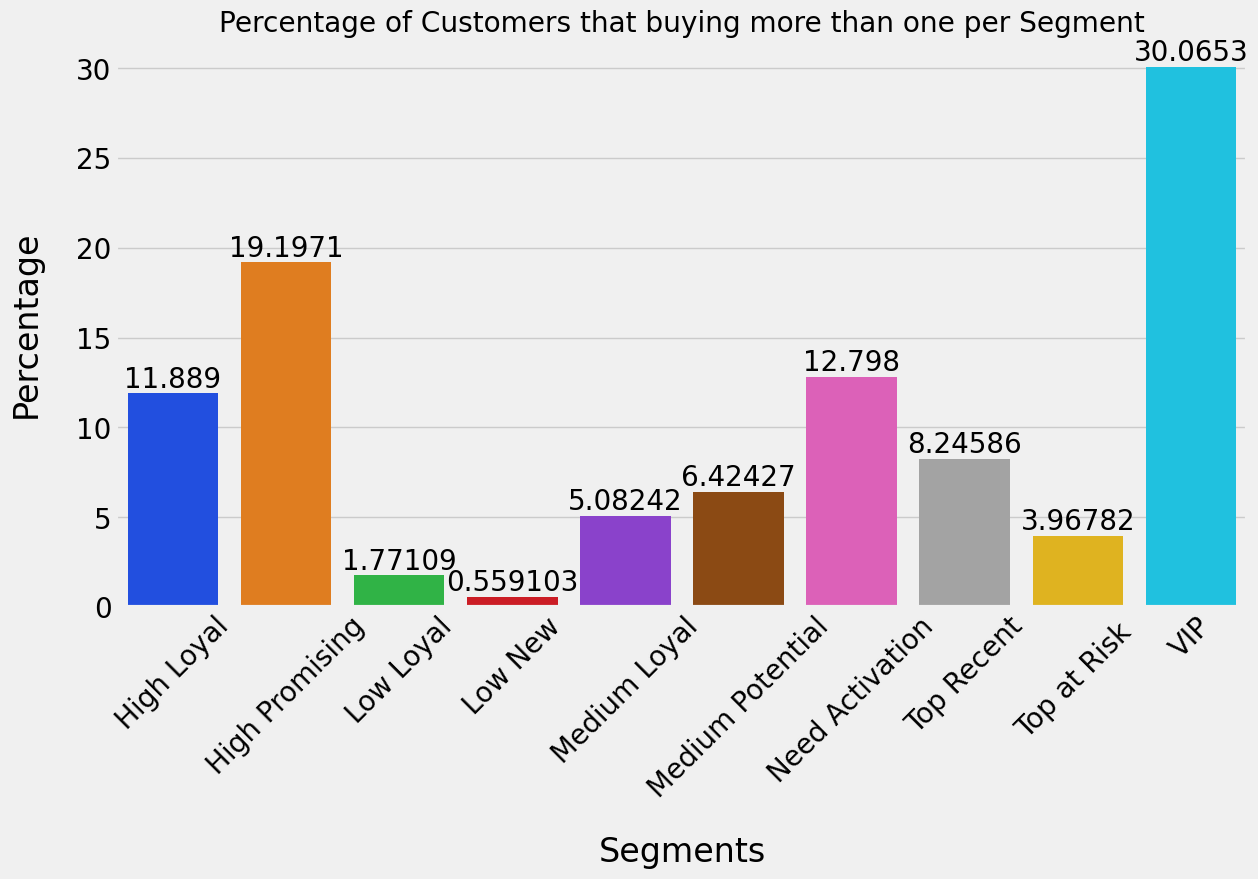

In [1260]:
plt.figure(figsize=(13,7))
plt.title('Percentage of Customers that buying more than one per Segment')


ax = sns.barplot(data = purchace_again_per_segment, x= 'Segment_labels', y = "Purchace_again%", palette = "bright")
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='black')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Segments', fontsize=24, labelpad=24, color='black')
plt.ylabel('Percentage', fontsize=24, labelpad=24, color='black')
plt.xticks(rotation=45, ha='center')
ax.tick_params(axis='x', colors='black', rotation=45)
ax.tick_params(axis='y', colors='black')

# Insights:

29.67% of customers from all Segments purchase more than one time
VIP, High promising & Need Activation are segments with customers who purchase more than one 

Pareto Analysis - Customers Segmentation
Here we'll try to analyze what % of customers produce what % of total sales. In this way we'll be able to identify our most valuable customers.

In [1261]:
segements_grouped

,Segment_labels,TotalMonetary,TotalCustomers,MeanRecency,MeanFrequency,Monetary%,Customers%,MeanMonetary
11,VIP,4368038.940520,12927,186.733117,4.570202,62.077099,13.835287,337.900436
9,Top Recent,1526824.425520,6978,320.773574,2.650043,21.698715,7.468293,218.805449
10,Top at Risk,440323.825320,3453,659.193455,1.892557,6.257734,3.695617,127.519208
2,High Promising,205591.532400,9279,196.497575,2.185365,2.921798,9.930968,22.156648
8,Need Activation,147289.187480,19796,646.294655,1.296070,2.093224,21.186921,7.440351
1,High New,131596.051200,6466,316.244200,1.000000,1.870199,6.920319,20.352003
0,High Loyal,69977.266760,3302,430.675651,3.145669,0.994493,3.534008,21.192388
6,Medium New,57367.802000,8884,323.635525,1.000000,0.815292,9.508214,6.457429
7,Medium Potential,43303.995520,6505,215.403075,1.332206,0.615422,6.962059,6.657032
3,Low Loyal,25956.854200,10497,362.955987,1.052968,0.368890,11.234548,2.472788


In [1262]:
segments_pareto = segements_grouped[["Segment_labels","TotalMonetary"]]
segments_pareto["CumulativePercentage"] = (segments_pareto["TotalMonetary"].cumsum()/segments_pareto["TotalMonetary"].sum()*100).round(2)

In [1263]:
segments_pareto

,Segment_labels,TotalMonetary,CumulativePercentage
11,VIP,4368038.940520,62.080000
9,Top Recent,1526824.425520,83.780000
10,Top at Risk,440323.825320,90.030000
2,High Promising,205591.532400,92.960000
8,Need Activation,147289.187480,95.050000
1,High New,131596.051200,96.920000
0,High Loyal,69977.266760,97.910000
6,Medium New,57367.802000,98.730000
7,Medium Potential,43303.995520,99.340000
3,Low Loyal,25956.854200,99.710000


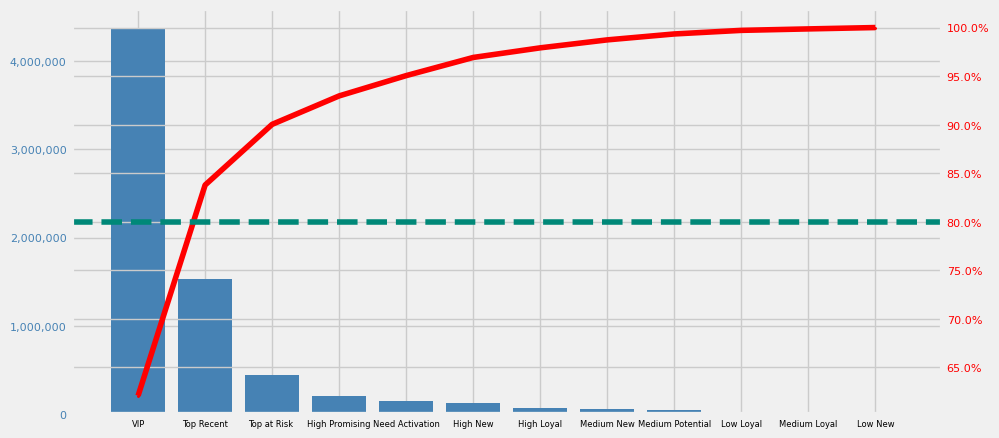

In [1264]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(segments_pareto['Segment_labels'], segments_pareto['TotalMonetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(segments_pareto['Segment_labels'], segments_pareto['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()

In [1265]:
df_grouped = df.groupby("Customer_ID").agg({"grand_total": np.sum})

df_grouped = df_grouped.sort_values("grand_total", ascending = False).reset_index()
df_grouped

,Customer_ID,grand_total
0,50387.0,71552.000000
1,163.0,24228.195600
2,1061.0,19015.524000
3,225.0,18863.296000
4,109038.0,17478.348000
...,...,...
93430,52335.0,0.004000
93431,52338.0,0.004000
93432,427.0,0.004000
93433,12342.0,0.004000


In [1266]:
df_grouped["CumulativePercentage"] = (df_grouped["grand_total"].cumsum()/df_grouped["grand_total"].sum()*100).round(2)                                  
df_grouped

,Customer_ID,grand_total,CumulativePercentage
0,50387.0,71552.000000,1.020000
1,163.0,24228.195600,1.360000
2,1061.0,19015.524000,1.630000
3,225.0,18863.296000,1.900000
4,109038.0,17478.348000,2.150000
...,...,...,...
93430,52335.0,0.004000,100.000000
93431,52338.0,0.004000,100.000000
93432,427.0,0.004000,100.000000
93433,12342.0,0.004000,100.000000


In [1267]:
# We focus on the part between 79,9% and 80.1% of Sales to find from which number of Customers it is produced

df_grouped[(df_grouped["CumulativePercentage"]>79.98) & (df_grouped["CumulativePercentage"]<=80)]

,Customer_ID,grand_total,CumulativePercentage
12572,99877.0,100.000000,79.990000
12573,99370.0,100.000000,79.990000
12574,98681.0,100.000000,79.990000
12575,94943.0,100.000000,79.990000
12576,100984.0,100.000000,79.990000
12577,97177.0,100.000000,79.990000
12578,99459.0,100.000000,79.990000
12579,98469.0,100.000000,80.000000
12580,102029.0,100.000000,80.000000
12581,98515.0,100.000000,80.000000


In [1268]:
# bring the 13% 
round(12579/(len(df_grouped)),2)*100

13.0

So we see that they represent 13% of total customers.

In this way we just found out that the highest 13% of customers produce 80% of total Sales.

So the Pareto Principle is applied almost perfectly in our example. 

In [1269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381714 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          381714 non-null  object        
 1   status           381714 non-null  object        
 2   order_date       381714 non-null  datetime64[ns]
 3   sku              381714 non-null  object        
 4   price            381714 non-null  float64       
 5   qty_ordered      381714 non-null  float64       
 6   grand_total      381714 non-null  float64       
 7   increment_id     381714 non-null  object        
 8   category_name_1  381714 non-null  object        
 9   discount_amount  381714 non-null  float64       
 10  payment_method   381714 non-null  object        
 11  Working Date     381714 non-null  object        
 12  BI Status        381714 non-null  object        
 13   MV              381714 non-null  object        
 14  Year             381714 n

Provide a full Monthly Cohort Analysis for our customer base.

In [1270]:
# Create the cohort and order_month variables

df['order_month'] = df['order_date'].dt.to_period('M')
df['cohort']= df.groupby('Customer_ID')['order_date'].transform('min').dt.to_period('M')
df

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,...,MV,Year,Month,Customer Since,M-Y,FY,Customer_ID,Recency,order_month,cohort
0,211131.0,complete,2016-07-01,kreations_YI 06-L,7.800000,1.000000,7.800000,100147443,Women's Fashion,0.000000,...,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.0,788,2016-07,2016-07
3,211135.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,1.440000,100147446,Beauty & Grooming,300.000000,...,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.0,788,2016-07,2016-07
4,211136.0,refunded,2016-07-01,BK7010400AG,2.220000,2.000000,4.440000,100147447,Soghaat,0.000000,...,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.0,788,2016-07,2016-07
6,211138.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,1.440000,100147449,Beauty & Grooming,300.000000,...,360,2016.000000,7.000000,2016-7,7-2016,FY17,7.0,788,2016-07,2016-07
7,211139.0,complete,2016-07-01,UK_Namkino Mix Nimco 400 Gms,0.680000,1.000000,0.680000,100147450,Soghaat,0.000000,...,170,2016.000000,7.000000,2016-7,7-2016,FY17,6.0,788,2016-07,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,2.796000,1.000000,2.796000,100562385,Women's Fashion,0.000000,...,699,2018.000000,8.000000,2018-8,8-2018,FY19,115320.0,0,2018-08,2018-08
584520,905205.0,pending,2018-08-28,MATHUA5AF70A7D1E50A,142.396000,1.000000,142.396000,100562386,Mobiles & Tablets,0.000000,...,"35,599",2018.000000,8.000000,2018-8,8-2018,FY19,115326.0,0,2018-08,2018-08
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,519.996000,2.000000,1039.992000,100562387,Mobiles & Tablets,0.000000,...,"259,998",2018.000000,8.000000,2018-7,8-2018,FY19,113474.0,0,2018-08,2018-08
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,349.200000,2.000000,698.400000,100562387,Mobiles & Tablets,0.000000,...,"174,600",2018.000000,8.000000,2018-7,8-2018,FY19,113474.0,0,2018-08,2018-08


In [1271]:
#We aggregate the data per cohort and order_month and count the number of unique customers in each group.

df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('Customer_ID',
                                                                   'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_month,n_customers,period_number
0,2016-07,2016-07,1964,0
1,2016-07,2016-08,404,1
2,2016-07,2016-09,332,2
3,2016-07,2016-10,290,3
4,2016-07,2016-11,410,4
...,...,...,...,...
346,2018-06,2018-07,115,1
347,2018-06,2018-08,45,2
348,2018-07,2018-07,1357,0
349,2018-07,2018-08,81,1


In [1272]:
# We aggregate the data per cohort and order_month and count the number of unique customers in each group.

cohort_pivot = df_cohort.pivot_table(index='cohort', 
                                     columns='period_number', 
                                     values='n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
cohort,,,,,,,,,,,,,,,,,,,,,
2016-07,1964.000000,404.000000,332.000000,290.000000,410.000000,254.000000,229.000000,188.000000,217.000000,219.000000,...,171.000000,75.000000,60.000000,49.000000,61.000000,49.000000,67.000000,57.000000,43.000000,42.000000
2016-08,2727.000000,334.000000,243.000000,380.000000,196.000000,175.000000,143.000000,148.000000,137.000000,139.000000,...,63.000000,49.000000,48.000000,62.000000,49.000000,51.000000,37.000000,24.000000,38.000000,NaN
2016-09,3643.000000,516.000000,831.000000,287.000000,246.000000,192.000000,263.000000,262.000000,299.000000,174.000000,...,85.000000,82.000000,122.000000,72.000000,109.000000,62.000000,51.000000,72.000000,NaN,NaN
2016-10,2273.000000,464.000000,190.000000,162.000000,123.000000,145.000000,131.000000,140.000000,73.000000,74.000000,...,32.000000,43.000000,36.000000,39.000000,24.000000,20.000000,18.000000,NaN,NaN,NaN
2016-11,12304.000000,1136.000000,584.000000,486.000000,547.000000,551.000000,657.000000,392.000000,466.000000,428.000000,...,219.000000,155.000000,233.000000,123.000000,90.000000,115.000000,NaN,NaN,NaN,NaN
2016-12,2386.000000,242.000000,140.000000,130.000000,98.000000,97.000000,46.000000,60.000000,62.000000,30.000000,...,23.000000,30.000000,21.000000,13.000000,13.000000,NaN,NaN,NaN,NaN,NaN
2017-01,2235.000000,213.000000,124.000000,113.000000,96.000000,68.000000,62.000000,63.000000,36.000000,40.000000,...,36.000000,20.000000,16.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,2631.000000,255.000000,132.000000,104.000000,74.000000,79.000000,64.000000,37.000000,35.000000,94.000000,...,27.000000,20.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,4008.000000,330.000000,227.000000,126.000000,133.000000,115.000000,48.000000,62.000000,159.000000,60.000000,...,26.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1273]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

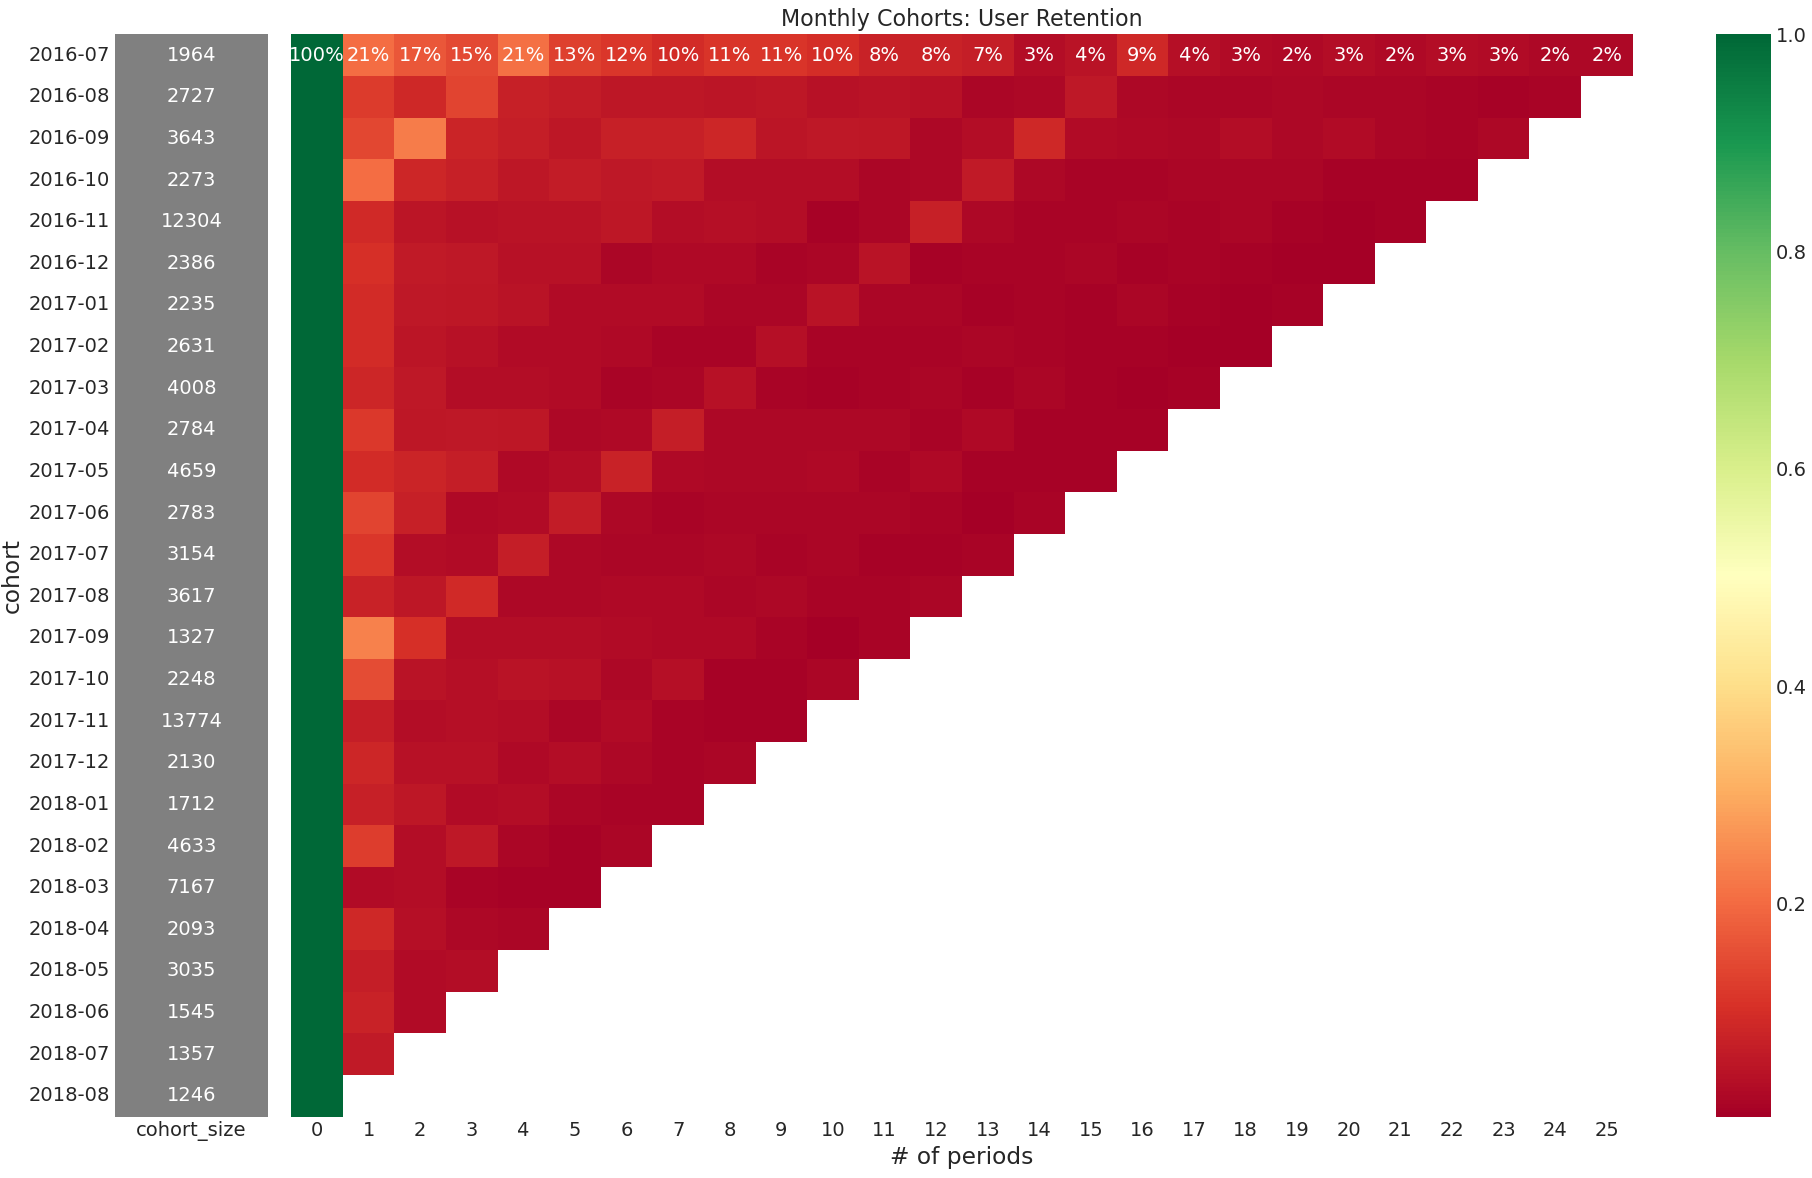

In [1274]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['grey'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

By excluding first and last cohort the top 3 cohorts by sizes are:

cohort 2017-11 with size 13774 new customers

cohort 2016-11 with size 12304 new customers

cohort 2018-03 with size 7167 new customers

Also by including all cohorts, it seems that the market has bad cohort retention.

